In [37]:
import pandas as pd

data = pd.read_csv("dds_datasets/dds_ch2_nyt/nyt1.csv")
data

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [38]:
data.isnull().sum()

Age            0
Gender         0
Impressions    0
Clicks         0
Signed_In      0
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [40]:
data.Age.unique()

array([ 36,  73,  30,  49,  47,   0,  46,  16,  52,  21,  57,  31,  40,
        38,  59,  61,  48,  29,  19,  23,  66,  44,  32,  22,  74,  65,
        63,  35,  33,  34,  43,  18,  17,  62,  27,  11,  42,  41,  14,
        64,  24,  26,  39,  71,  45,  28,  83,  79,  67,  51,  60,  58,
        53,  25,  50,  76,  15,  78,  55,  37,  56,  77,  85,  82,  13,
        70,  84,  54,  20,  10,  81,  68,  72,  69,  87,  80,  88,  12,
        86,  75,  89,   9,  96, 102,  98,  90,  99,  91,  92,  95,   8,
        94,  93,  97,   7, 100, 103, 107, 101, 108, 104])

In [41]:
data.groupby("Age").count()

,Gender,Impressions,Clicks,Signed_In
Age,,,,
0,137106,137106,137106,137106
7,5,5,5,5
8,15,15,15,15
9,48,48,48,48
10,113,113,113,113
...,...,...,...,...
102,2,2,2,2
103,2,2,2,2
104,1,1,1,1


In [42]:
data[data.Age == 0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,137106,137106,137106,137106


In [43]:
data[data.Age>0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,153070,153070,153070,153070
1,168265,168265,168265,168265


In [44]:
data_no_null_age = data[(data.Age>0)&(data.Signed_In == 1)]
data_no_null_age

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458432,30,0,4,0,1
458433,21,1,2,0,1
458434,61,1,6,0,1
458435,51,0,7,0,1


<AxesSubplot: >

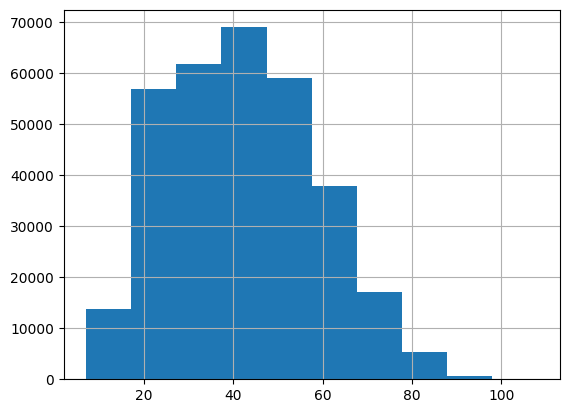

In [45]:
data_no_null_age.Age.hist()

In [46]:
def age_classify(number):
    if number < 18:
        return "<18"
    elif number <= 24:
        return "18-24"
    elif number <= 34:
        return "25-34"
    elif number <= 44:
        return "35-44"
    elif number <= 54:
        return "45-54"
    elif number <= 64:
        return "55-64"
    else:
        return "65+"
    
grouped_age_data = data_no_null_age
grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x:age_classify(x))
grouped_age_data

/tmp/ipykernel_11463/442339826.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x:age_classify(x))


,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


In [47]:
grouped_age_data.Age.apply(lambda x:age_classify(x))

0         35-44
1           65+
2         25-34
3         45-54
4         45-54
          ...  
458432    25-34
458433    18-24
458434    55-64
458435    45-54
458438      65+
Name: Age, Length: 321335, dtype: object

In [48]:
grouped_age_data.age_group.isnull().sum()

0

In [49]:
grouped_age_data.groupby("age_group").get_group("45-54")

,Age,Gender,Impressions,Clicks,Signed_In,age_group
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
5,47,0,11,1,1,45-54
7,46,0,5,0,1,45-54
9,52,0,4,0,1,45-54
...,...,...,...,...,...,...
458421,46,1,4,0,1,45-54
458422,47,0,6,0,1,45-54
458426,49,0,9,0,1,45-54
458429,49,1,11,0,1,45-54


In [50]:
grouped_age_data.groupby("age_group").sum()

,Age,Gender,Impressions,Clicks,Signed_In
age_group,,,,,
18-24,847791,21721,203585,2167,40694
25-34,1716328,30958,290511,2937,58174
35-44,2798593,37676,355824,3662,70860
45-54,3181779,34007,322109,3232,64288
55-64,2661830,23988,224688,4556,44738
65+,2098644,10445,144120,4350,28753
<18,211045,9470,69239,2065,13828


In [51]:
grouped_age_data.groupby("age_group").mean()

,Age,Gender,Impressions,Clicks,Signed_In
age_group,,,,,
18-24,20.833317,0.533764,5.002826,0.053251,1.0
25-34,29.503352,0.532162,4.993829,0.050486,1.0
35-44,39.494680,0.531696,5.021507,0.051679,1.0
45-54,49.492580,0.528979,5.010406,0.050274,1.0
55-64,59.498189,0.536188,5.022308,0.101837,1.0
65+,72.988697,0.363266,5.012347,0.151289,1.0
<18,15.262149,0.684842,5.007159,0.149335,1.0


In [52]:
ctr_data = grouped_age_data.groupby("age_group").sum()
ctr_data["CTR"]=ctr_data.Clicks/ctr_data.Impressions
ctr_data

,Age,Gender,Impressions,Clicks,Signed_In,CTR
age_group,,,,,,
18-24,847791,21721,203585,2167,40694,0.010644
25-34,1716328,30958,290511,2937,58174,0.010110
35-44,2798593,37676,355824,3662,70860,0.010292
45-54,3181779,34007,322109,3232,64288,0.010034
55-64,2661830,23988,224688,4556,44738,0.020277
65+,2098644,10445,144120,4350,28753,0.030183
<18,211045,9470,69239,2065,13828,0.029824


<AxesSubplot: xlabel='age_group'>

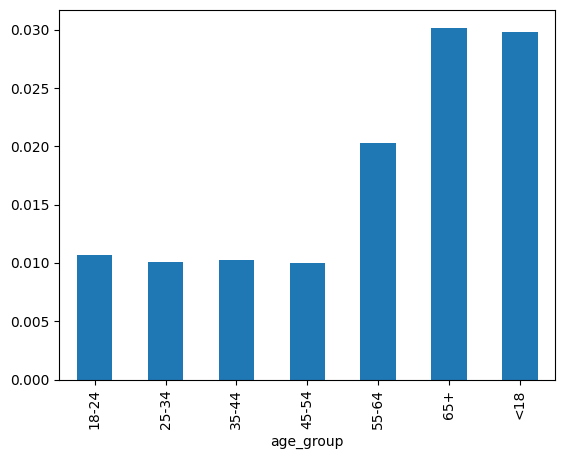

In [53]:
ctr_data.CTR.plot(kind="bar")

In [54]:
aged_data_18 = grouped_age_data.groupby("age_group").get_group("<18")
aged_data_18

,Age,Gender,Impressions,Clicks,Signed_In,age_group
8,16,0,3,0,1,<18
61,17,1,6,0,1,<18
67,11,0,5,0,1,<18
74,14,0,7,0,1,<18
130,14,1,5,0,1,<18
...,...,...,...,...,...,...
458211,16,1,4,0,1,<18
458261,16,1,9,0,1,<18
458338,14,1,6,0,1,<18
458359,11,0,6,0,1,<18


In [55]:
aged_data_18.groupby("Gender").mean().drop(columns="Signed_In")

,Age,Impressions,Clicks
Gender,,,
0,15.246214,5.002295,0.156723
1,15.269483,5.009398,0.145935


In [56]:
lab_data_1 = grouped_age_data[grouped_age_data.Age>18]
lab_data_1 = lab_data_1.drop(columns="Signed_In")
lab_data_1

,Age,Gender,Impressions,Clicks,age_group
0,36,0,3,0,35-44
1,73,1,3,0,65+
2,30,0,3,0,25-34
3,49,1,3,0,45-54
4,47,1,11,0,45-54
...,...,...,...,...,...
458432,30,0,4,0,25-34
458433,21,1,2,0,18-24
458434,61,1,6,0,55-64
458435,51,0,7,0,45-54


In [57]:
def sex_classify(gender):
    if gender == 0:
        return "Male"
    else:
        return "Female"
    
lab_data_1["Gender"] = lab_data_1.Gender.apply(lambda x:sex_classify(x))
lab_data_1

,Age,Gender,Impressions,Clicks,age_group
0,36,Male,3,0,35-44
1,73,Female,3,0,65+
2,30,Male,3,0,25-34
3,49,Female,3,0,45-54
4,47,Female,11,0,45-54
...,...,...,...,...,...
458432,30,Male,4,0,25-34
458433,21,Female,2,0,18-24
458434,61,Female,6,0,55-64
458435,51,Male,7,0,45-54


In [58]:
lab_data_1["CTR"] = lab_data_1.Clicks/lab_data_1.Impressions
lab_data_1

,Age,Gender,Impressions,Clicks,age_group,CTR
0,36,Male,3,0,35-44,0.0
1,73,Female,3,0,65+,0.0
2,30,Male,3,0,25-34,0.0
3,49,Female,3,0,45-54,0.0
4,47,Female,11,0,45-54,0.0
...,...,...,...,...,...,...
458432,30,Male,4,0,25-34,0.0
458433,21,Female,2,0,18-24,0.0
458434,61,Female,6,0,55-64,0.0
458435,51,Male,7,0,45-54,0.0


<AxesSubplot: xlabel='age_group'>

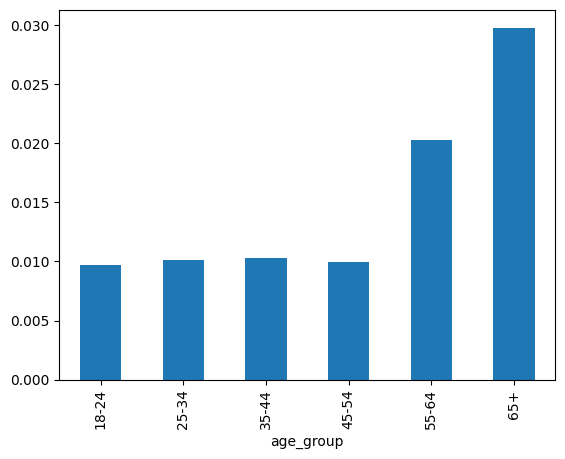

In [59]:
lab_data_1.groupby("age_group").CTR.mean().plot(kind="bar")

In [60]:
lab_data_1.groupby("age_group").CTR.mean()

age_group
18-24    0.009720
25-34    0.010146
35-44    0.010286
45-54    0.009958
55-64    0.020307
65+      0.029803
Name: CTR, dtype: float64

In [61]:
result_data = lab_data_1.groupby("age_group").mean()
result_data = result_data.drop(columns="Age") 
result_data.rename(columns={"Impressions":"Impressions mean", "Clicks":"Clicks mean"}, inplace = True)
result_data

,Impressions mean,Clicks mean,CTR
age_group,,,
18-24,5.006635,0.048455,0.009720
25-34,4.993829,0.050486,0.010146
35-44,5.021507,0.051679,0.010286
45-54,5.010406,0.050274,0.009958
55-64,5.022308,0.101837,0.020307
65+,5.012347,0.151289,0.029803


<AxesSubplot: xlabel='age_group'>

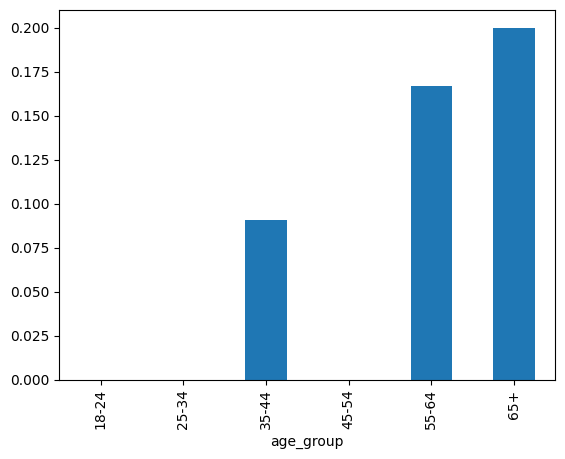

In [62]:
result_data["CTR quantile"]=lab_data_1.groupby("age_group").CTR.quantile(q=0.95)
result_data["CTR quantile"].plot(kind="bar")

<AxesSubplot: xlabel='age_group'>

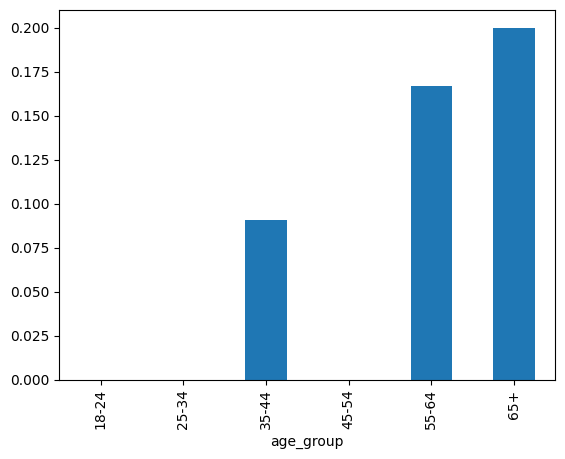

In [63]:
result_data["CTR quantile"]=lab_data_1.groupby("age_group").CTR.quantile(q=0.95)
result_data["CTR quantile"].plot(kind="bar")

<AxesSubplot: xlabel='age_group'>

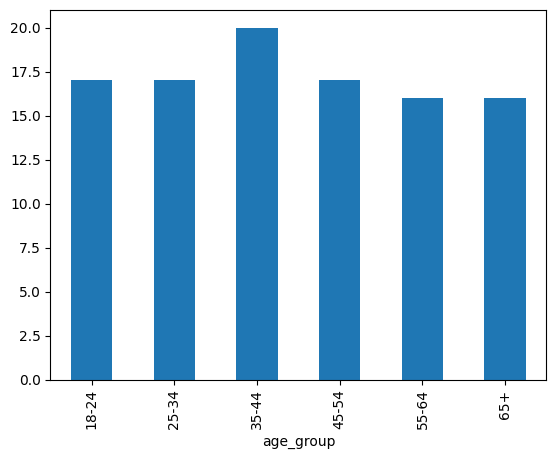

In [64]:
result_data["Impressions max"]=lab_data_1.groupby("age_group").Impressions.max()
result_data["Impressions max"].plot(kind="bar")

<AxesSubplot: xlabel='age_group'>

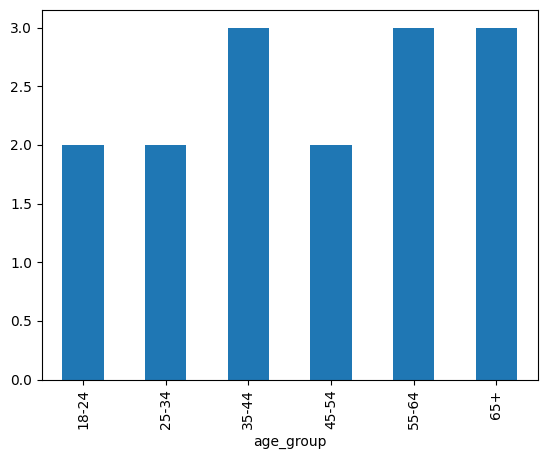

In [65]:
result_data["Clicks max"]=lab_data_1.groupby("age_group").Clicks.max()
result_data["Clicks max"].plot(kind="bar")

<AxesSubplot: xlabel='age_group'>

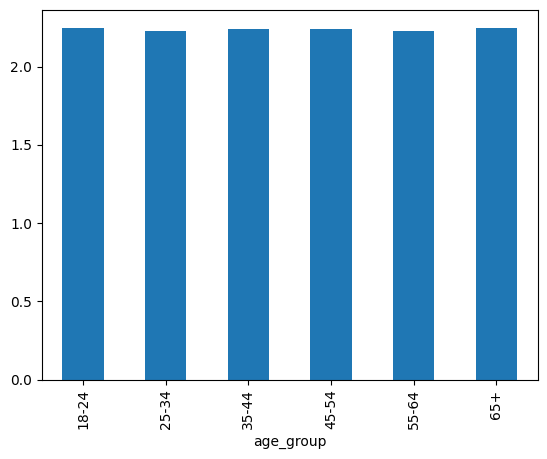

In [66]:
result_data["Impressions dispersion"]=lab_data_1.groupby("age_group").Impressions.std()
result_data["Impressions dispersion"].plot(kind="bar")

<AxesSubplot: xlabel='age_group'>

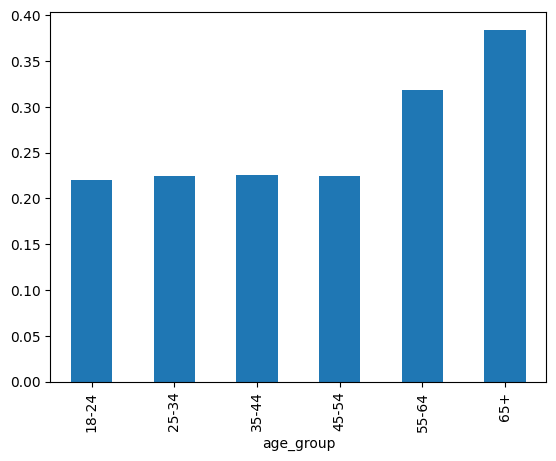

In [67]:
result_data["Clicks dispersion"]=lab_data_1.groupby("age_group").Clicks.std()
result_data["Clicks dispersion"].plot(kind="bar")

result_data

In [68]:
data = pd.read_csv("dds_datasets/dds_ch2_nyt/nyt2.csv")

data_no_null_age = data[(data.Age>0)&(data.Signed_In == 1)]
grouped_age_data = data_no_null_age
grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x:age_classify(x))

lab_data_2 = grouped_age_data[grouped_age_data.Age>18]
lab_data_2 = lab_data_2.drop(columns="Signed_In")

lab_data_2["Gender"] = lab_data_2.Gender.apply(lambda x:sex_classify(x))

lab_data_2["CTR"] = lab_data_2.Clicks/lab_data_2.Impressions

result_data_day2 = lab_data_2.groupby("age_group").mean()
result_data_day2 = result_data_day2.drop(columns="Age") 
result_data_day2.rename(columns={"Impressions":"Impressions mean", "Clicks":"Clicks mean"}, inplace = True)

result_data_day2["CTR quantile"]=lab_data_2.groupby("age_group").CTR.quantile(q=0.95)

result_data_day2["Impressions max"]=lab_data_2.groupby("age_group").Impressions.max()

result_data_day2["Clicks max"]=lab_data_2.groupby("age_group").Clicks.max()

result_data_day2["Impressions dispersion"]=lab_data_2.groupby("age_group").Impressions.std()

result_data_day2["Clicks dispersion"]=lab_data_2.groupby("age_group").Clicks.std()

/tmp/ipykernel_11463/3361404873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_age_data["age_group"] = grouped_age_data.Age.apply(lambda x:age_classify(x))


In [69]:
result_data_day2

,Impressions mean,Clicks mean,CTR,CTR quantile,Impressions max,Clicks max,Impressions dispersion,Clicks dispersion
age_group,,,,,,,,
18-24,4.986214,0.051783,0.010309,0.090909,16,3,2.248052,0.227396
25-34,5.007083,0.050230,0.010153,0.000000,18,3,2.235247,0.223983
35-44,4.987068,0.051019,0.010196,0.072802,16,3,2.226515,0.225955
45-54,4.994392,0.051227,0.010316,0.076923,17,3,2.228464,0.227166
55-64,5.020435,0.101605,0.020152,0.166667,16,3,2.240195,0.318949
65+,4.996207,0.146399,0.029019,0.200000,17,3,2.225281,0.383437


<AxesSubplot: xlabel='age_group'>

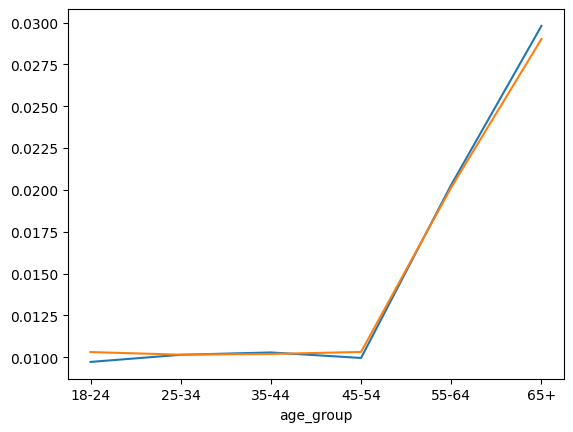

In [70]:
ax = result_data.CTR.plot()
result_data_day2.CTR.plot(ax=ax)